In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
from scipy.spatial.distance import cdist
import time
import warnings

In [2]:
import matplotlib.pyplot as plt

In [3]:
def generate_curve(params):

    theta_rad, M, X = params

    t = np.linspace(6, 60, 1000)

    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)
    exp_term = np.exp(M * np.abs(t))
    sin_0_3t = np.sin(0.3 * t)



    x_curve = (t * cos_theta - exp_term * sin_0_3t * sin_theta + X)


    y_curve = (42 + t * sin_theta + exp_term * sin_0_3t * cos_theta)


    return np.stack((x_curve, y_curve), axis=1)

In [4]:


def calculate_loss(params, data_points):

    predicted_curve = generate_curve(params)


    distances = cdist(data_points, predicted_curve, 'cityblock')

    min_distances_to_curve = np.min(distances, axis=1)

    mean_loss = np.mean(min_distances_to_curve)

    return mean_loss

Successfully loaded 1500 data points from 'xy_data.csv'.
Optimization finished in 16.94 seconds.

-- Optimization Successful --
Final Loss (Mean L1 Distance): 0.019388

--- Automatically Found Parameters ---
Theta (θ): 30.000389 degrees
M:         0.030000
X:         55.000728
Plot saved to automatic_fit_plot.png


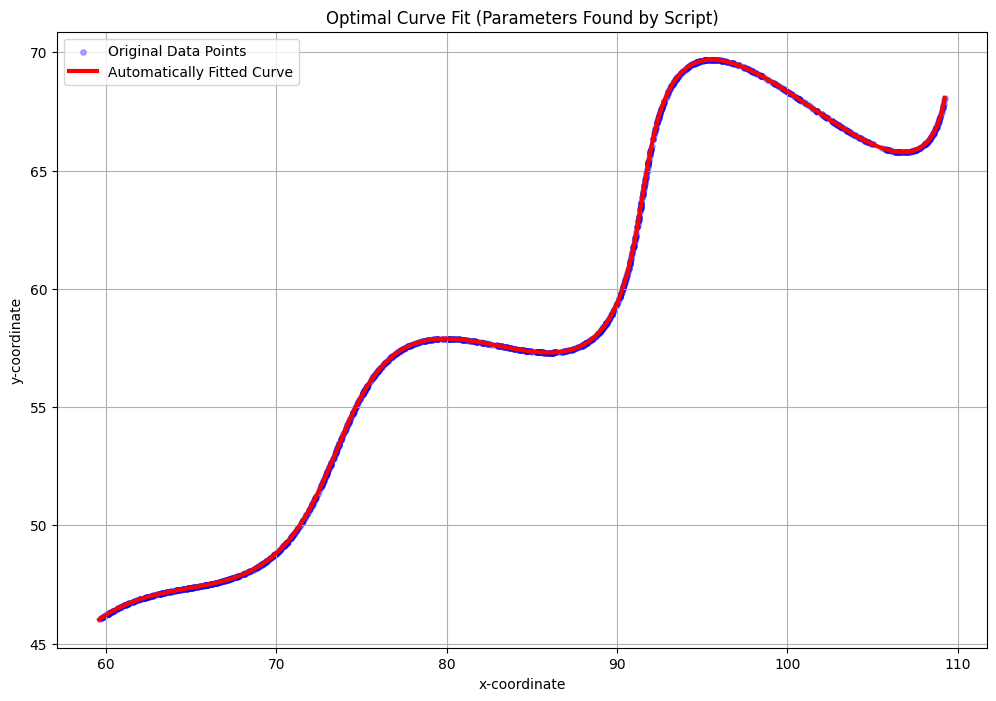

In [5]:

warnings.filterwarnings("ignore", category=RuntimeWarning)
try:
    df = pd.read_csv('xy_data.csv')
    data_points = df.values
    print(f"Successfully loaded {len(data_points)} data points from 'xy_data.csv'.")

    bounds = [
        (0, 50 * np.pi / 180),
        (-0.05, 0.05),
        (0, 100)
    ]

    start_time = time.time()

    result = differential_evolution(
        calculate_loss,
        bounds,
        args=(data_points,),
        strategy='best1bin',
        maxiter=500,
        popsize=20,
        tol=0.01,
        disp=False
    )

    end_time = time.time()
    print(f"Optimization finished in {end_time - start_time:.2f} seconds.")

    if result.success:

        optimal_params = result.x
        best_loss = result.fun


        print("\n-- Optimization Successful --")
        print(f"Final Loss (Mean L1 Distance): {best_loss:.6f}")
        print("\n--- Automatically Found Parameters ---")
        print(f"Theta (θ): {optimal_params[0] * 180 / np.pi:.6f} degrees")
        print(f"M:         {optimal_params[1]:.6f}")
        print(f"X:         {optimal_params[2]:.6f}")





        final_curve = generate_curve(optimal_params)
        x_fit = final_curve[:, 0]
        y_fit = final_curve[:, 1]

        x_data = data_points[:, 0]
        y_data = data_points[:, 1]


        plt.figure(figsize=(12, 8))
        plt.scatter(x_data, y_data, label='Original Data Points', alpha=0.3, s=15, color='blue')
        plt.plot(x_fit, y_fit, label='Automatically Fitted Curve', color='red', linewidth=3)
        plt.title('Optimal Curve Fit (Parameters Found by Script)')
        plt.xlabel('x-coordinate')
        plt.ylabel('y-coordinate')
        plt.legend()
        plt.grid(True)

        plot_filename = 'automatic_fit_plot.png'
        plt.savefig(plot_filename)
        print(f"Plot saved to {plot_filename}")

    else:
        print("\nOptimization failed to converge.")
        print(f"Message: {result.message}")

except FileNotFoundError:
    print("\n--- ERROR ---")
    print("The file 'xy_data.csv' was not found.")
except Exception as e:
    print(f"\nAn error occurred: {e}")